# Import các thư viện cần thiết

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 1. Đọc và kiểm tra dữ liệu
# Đọc dữ liệu từ file CSV (giả sử data được lưu dưới dạng CSV)

In [3]:
df = pd.read_csv('processed_network_data.csv')

In [4]:
print("=== Thông tin cơ bản về dataset ===")
print("\nKích thước dataset:", df.shape)
print("\nThông tin chi tiết các cột:")
print(df.info())

=== Thông tin cơ bản về dataset ===

Kích thước dataset: (104345, 6)

Thông tin chi tiết các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   speed_src_ip    104323 non-null  float64
 1   std_n_packets   104345 non-null  float64
 2   std_bytes       104345 non-null  float64
 3   bytes_per_flow  104345 non-null  float64
 4   n_int_flows     104345 non-null  float64
 5   class           104345 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.8 MB
None


In [5]:
print("\n=== Thống kê mô tả ===")
print(df.describe())


=== Thống kê mô tả ===
       speed_src_ip  std_n_packets     std_bytes  bytes_per_flow  \
count  1.043230e+05   1.043450e+05  1.043450e+05    1.043450e+05   
mean            inf  -4.358113e-17 -6.537170e-17    1.064462e+07   
std             NaN   1.000005e+00  1.000005e+00    1.620305e+07   
min    0.000000e+00  -1.016108e+00 -7.828772e-01    0.000000e+00   
25%    9.775785e-01  -1.000576e+00 -7.812458e-01    1.336067e+04   
50%    2.987420e+02  -1.928562e-01 -6.501938e-01    1.480056e+06   
75%    4.357364e+02   8.060868e-01  7.793992e-01    1.622067e+07   
max             inf   3.981798e+00  2.233447e+00    7.197419e+07   

        n_int_flows          class  
count  1.043450e+05  104345.000000  
mean            inf       0.390857  
std             NaN       0.487945  
min    1.153820e-05       0.000000  
25%    4.830840e-05       0.000000  
50%    1.222755e-04       0.000000  
75%    7.407407e-03       1.000000  
max             inf       1.000000  


In [6]:
print("\n=== Kiểm tra giá trị null ===")
print(df.isnull().sum())


=== Kiểm tra giá trị null ===
speed_src_ip      22
std_n_packets      0
std_bytes          0
bytes_per_flow     0
n_int_flows        0
class              0
dtype: int64


In [7]:
plt.style.use('seaborn')

In [9]:
def plot_distributions(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n_cols = len(numeric_cols)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))

    for idx, col in enumerate(numeric_cols):
        # Histogram
        sns.histplot(data=df, x=col, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Distribution of {col}')

        # Box plot
        sns.boxplot(data=df, y=col, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

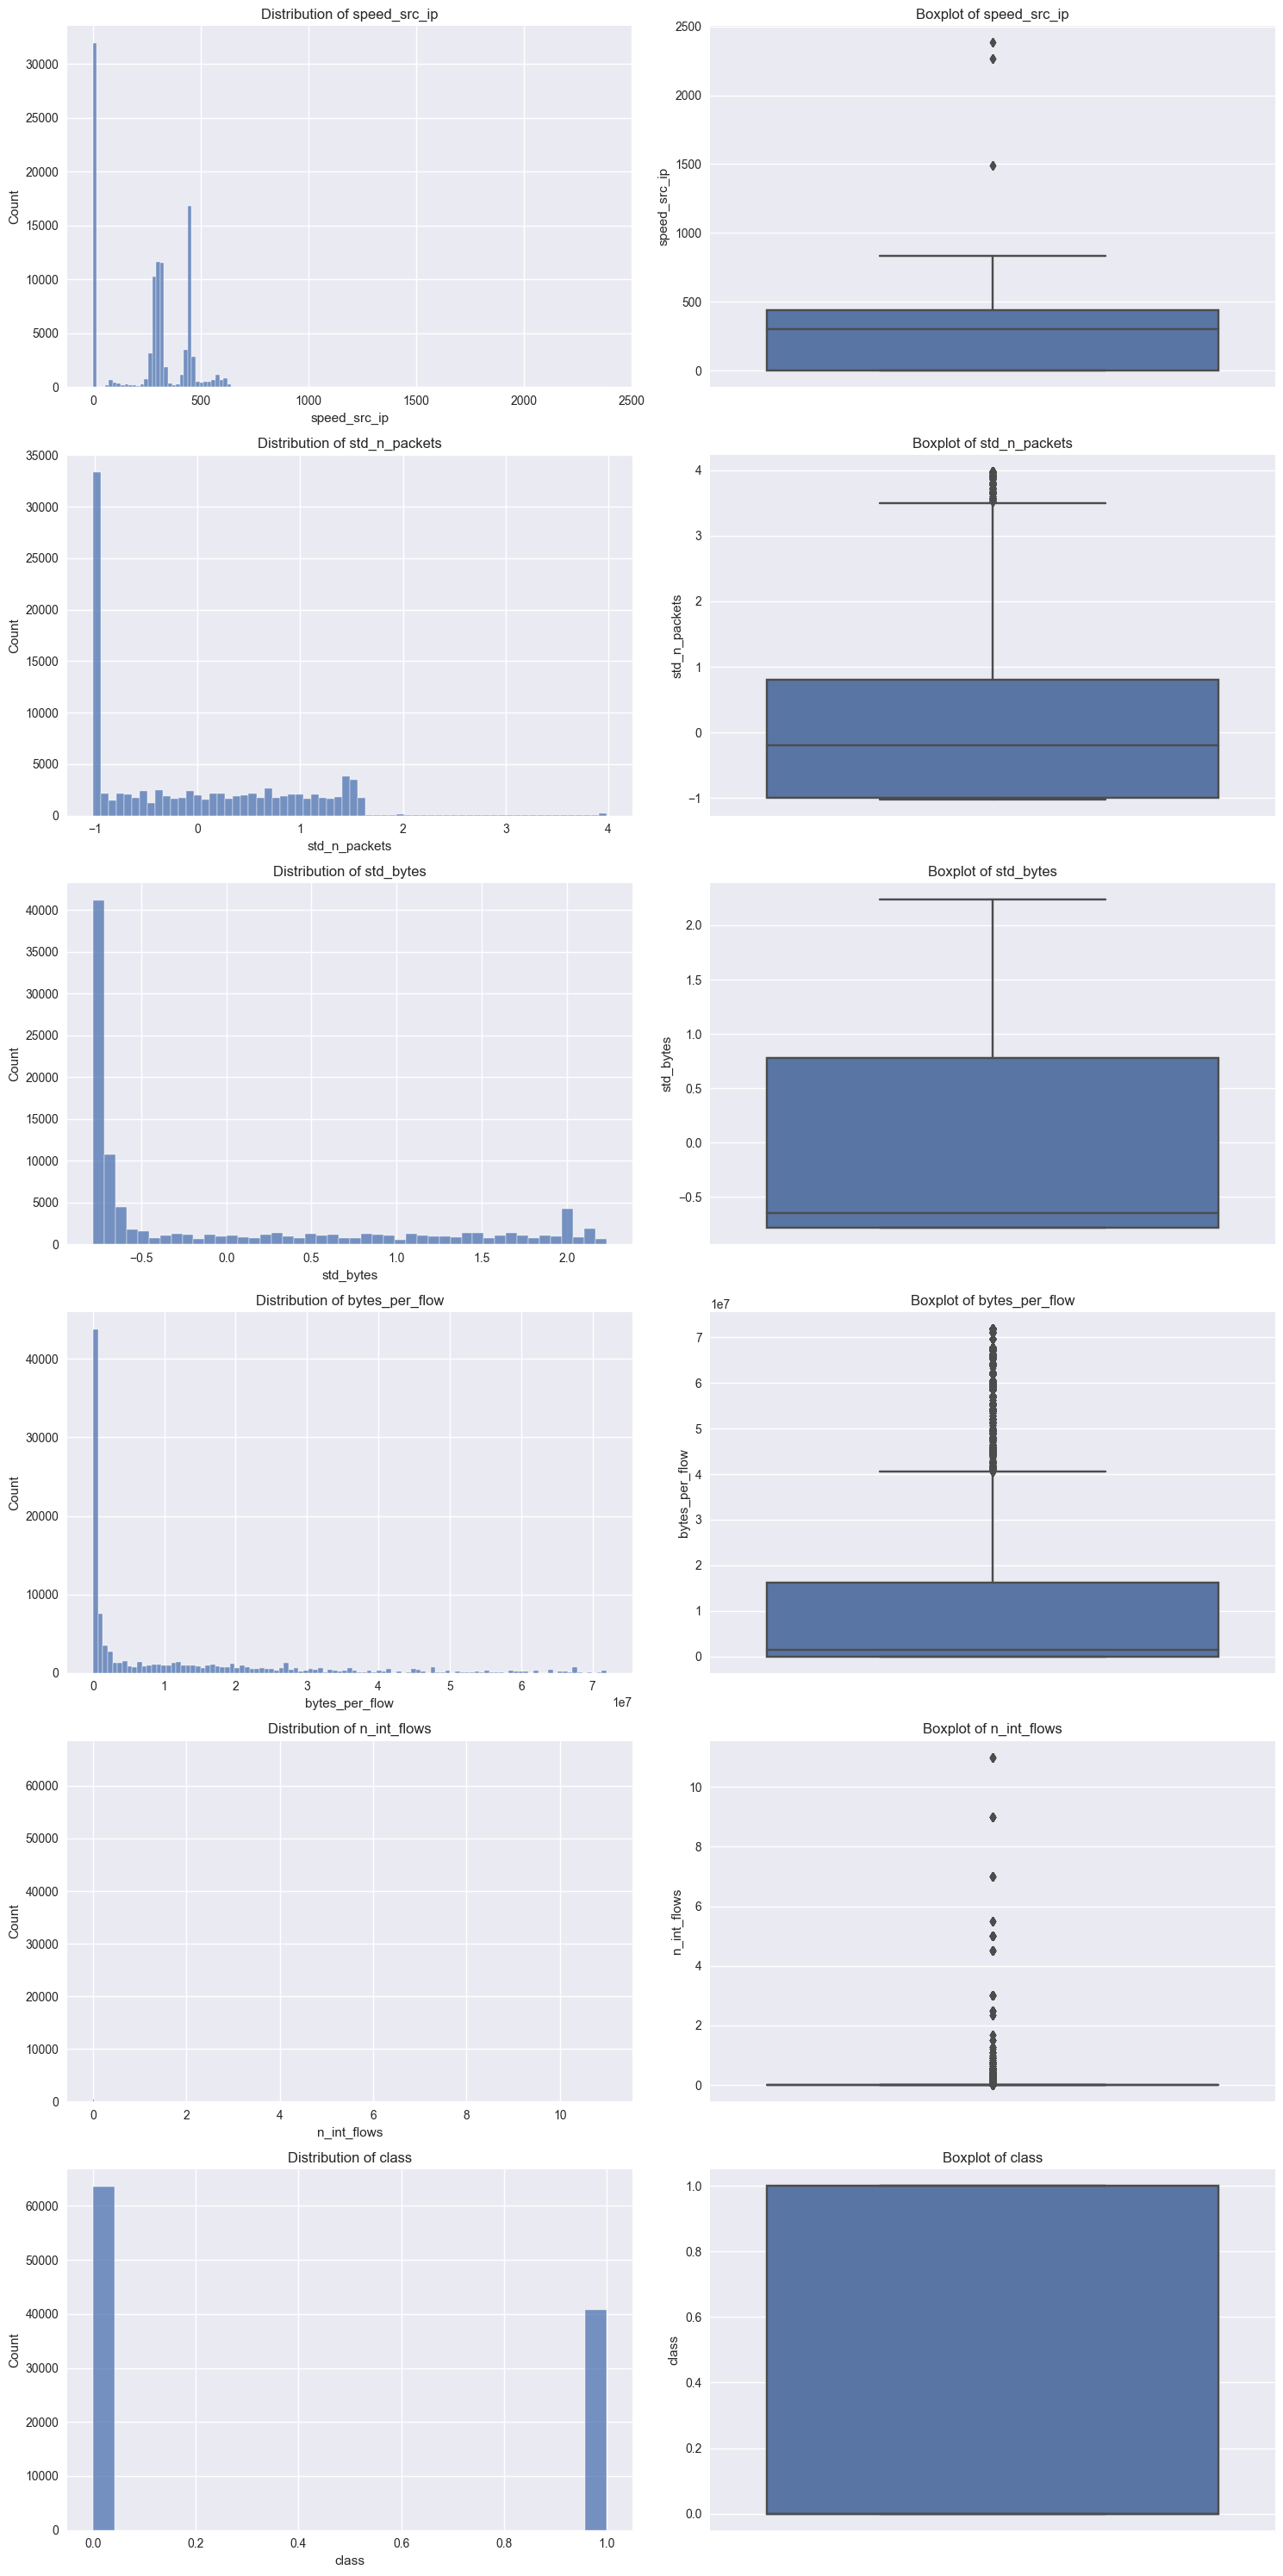

In [10]:
plot_distributions(df)

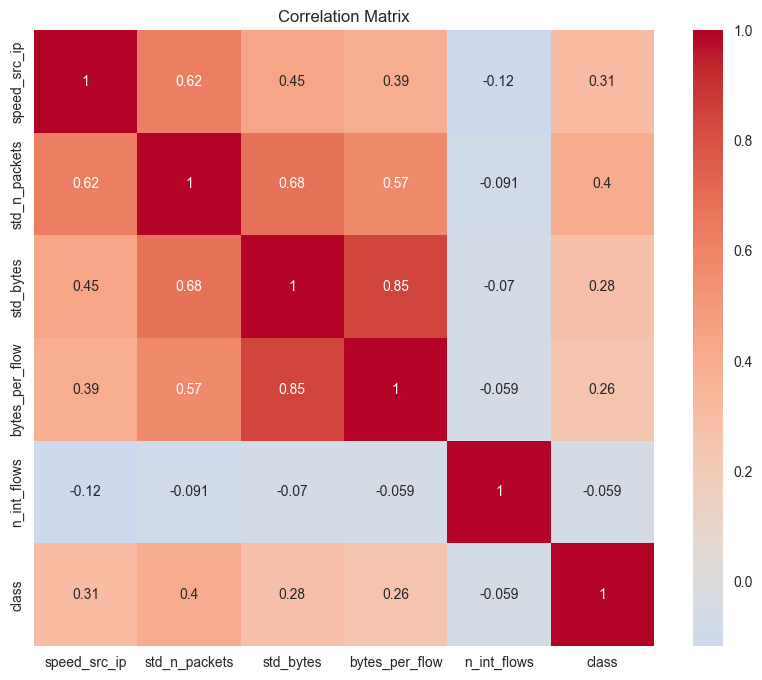

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [12]:
def plot_scatter_matrix(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    sns.pairplot(df[numeric_cols], diag_kind='kde')
    plt.show()

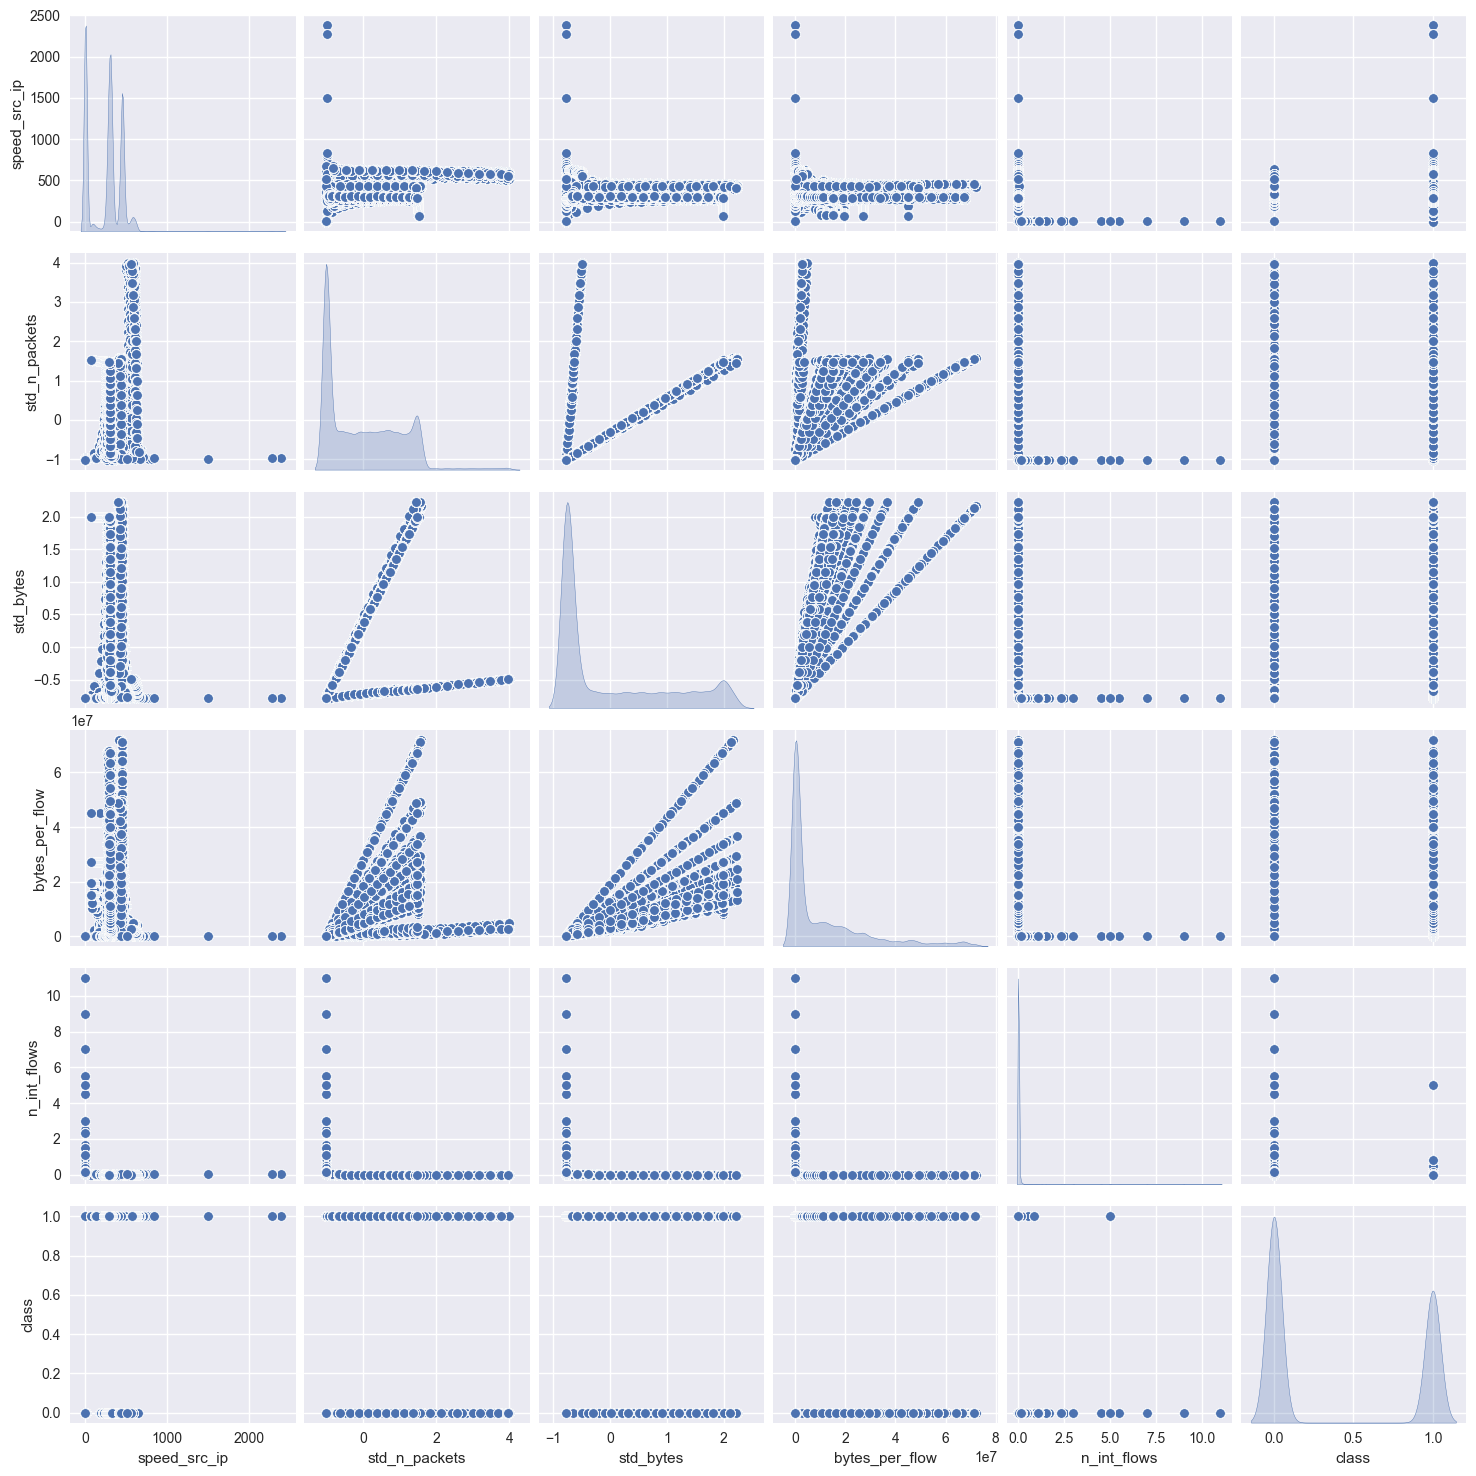

In [13]:
plot_scatter_matrix(df)

In [14]:
# 3. Feature Engineering và Data Preprocessing
def preprocess_data(df):
    # Tạo bản sao của dataframe
    df_processed = df.copy()

    # 3.1 Tạo thêm features mới
    df_processed['log_bytes_per_flow'] = np.log1p(df_processed['bytes_per_flow'])
    df_processed['packets_bytes_ratio'] = df_processed['std_n_packets'] / df_processed['std_bytes']

    # 3.2 Xử lý outliers (nếu cần)
    def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

    # Áp dụng xử lý outliers cho các cột số
    numeric_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df_processed = remove_outliers(df_processed, col)

    # 3.3 Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

    return df_processed

# Thực hiện preprocessing
df_processed = preprocess_data(df)


=== Thống kê mô tả sau khi preprocessing ===
       speed_src_ip  std_n_packets     std_bytes  bytes_per_flow  \
count  7.609500e+04   7.609500e+04  7.609500e+04    7.609500e+04   
mean   8.366467e-17   4.183233e-17  2.390419e-17    5.677245e-17   
std    1.000007e+00   1.000007e+00  1.000007e+00    1.000007e+00   
min   -1.443755e+00  -1.096994e+00 -7.937900e-01   -7.597893e-01   
25%   -1.443542e+00  -1.078267e+00 -7.921005e-01   -7.581696e-01   
50%    2.501384e-01  -6.271977e-02 -6.730252e-01   -6.485120e-01   
75%    9.807445e-01   8.297920e-01  7.788182e-01    6.319950e-01   
max    3.190184e+00   2.005506e+00  2.325782e+00    2.994838e+00   

        n_int_flows         class  log_bytes_per_flow  packets_bytes_ratio  
count  7.609500e+04  7.609500e+04        7.609500e+04         7.609500e+04  
mean   5.378443e-17  8.067664e-17       -2.868503e-16        -1.494012e-16  
std    1.000007e+00  1.000007e+00        1.000007e+00         1.000007e+00  
min   -5.789420e-01 -7.947166e-01

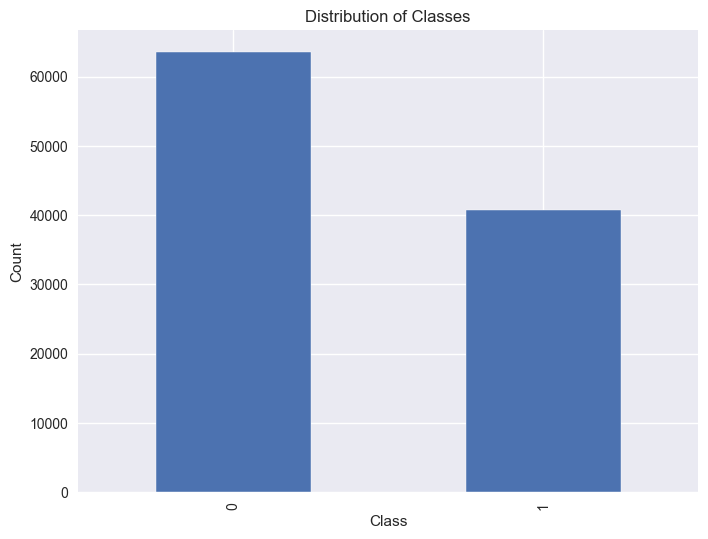

In [15]:
# Hiển thị kết quả sau preprocessing
print("\n=== Thống kê mô tả sau khi preprocessing ===")
print(df_processed.describe())

# 4. Phân tích phân phối của class
plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 5. Lưu dữ liệu đã xử lý
df_processed.to_csv('processed_network_flow_data.csv', index=False)

In [16]:
# 6. Tạo báo cáo tổng quan
print("\n=== BÁO CÁO TỔNG QUAN ===")
print(f"""
1. Kích thước dataset: {df.shape[0]} dòng, {df.shape[1]} cột
2. Các features chính:
   - speed_src_ip: Tốc độ nguồn IP
   - std_n_packets: Độ lệch chuẩn số lượng gói tin
   - std_bytes: Độ lệch chuẩn bytes
   - bytes_per_flow: Số bytes trên mỗi flow
   - n_int_flows: Số lượng internal flows
   - class: Nhãn phân loại
3. Phân bố classes:
{df['class'].value_counts().to_string()}
4. Correlations đáng chú ý:
{correlation_matrix.unstack().sort_values(ascending=False)[:5].to_string()}
""")


=== BÁO CÁO TỔNG QUAN ===

1. Kích thước dataset: 104345 dòng, 6 cột
2. Các features chính:
   - speed_src_ip: Tốc độ nguồn IP
   - std_n_packets: Độ lệch chuẩn số lượng gói tin
   - std_bytes: Độ lệch chuẩn bytes
   - bytes_per_flow: Số bytes trên mỗi flow
   - n_int_flows: Số lượng internal flows
   - class: Nhãn phân loại
3. Phân bố classes: 
0    63561
1    40784
4. Correlations đáng chú ý:
speed_src_ip    speed_src_ip      1.0
std_n_packets   std_n_packets     1.0
n_int_flows     n_int_flows       1.0
bytes_per_flow  bytes_per_flow    1.0
std_bytes       std_bytes         1.0



=== 1. Đọc và chuẩn bị dữ liệu ===

=== 3. Training và đánh giá các mô hình ===

=== Kết quả đánh giá Linear Regression ===
Mean Squared Error: 0.7074
Root Mean Squared Error: 0.8411
Mean Absolute Error: 0.7213
R2 Score: 0.2924
Cross-validation R2 scores: [0.29297629 0.28983156 0.28726587 0.29510835 0.28342043]
Mean CV R2 score: 0.2897 (+/- 0.0083)


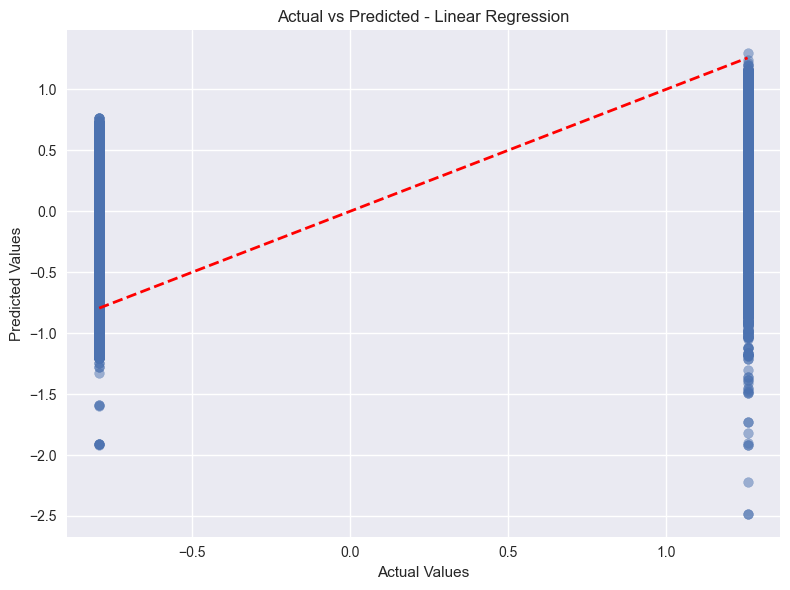


=== Kết quả đánh giá Decision Tree ===
Mean Squared Error: 0.0019
Root Mean Squared Error: 0.0440
Mean Absolute Error: 0.0009
R2 Score: 0.9981
Cross-validation R2 scores: [0.99373215 0.9910618  0.98991128 0.99104345 0.99271851]
Mean CV R2 score: 0.9917 (+/- 0.0027)


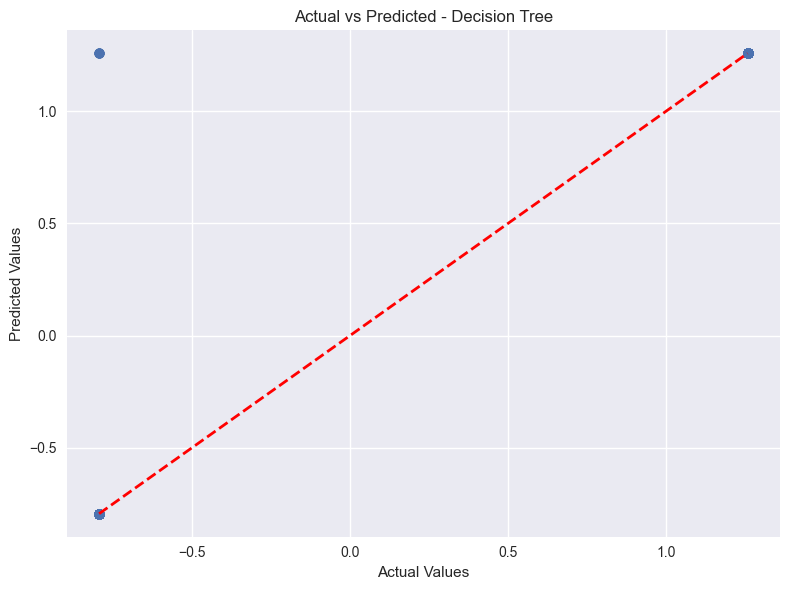


=== Kết quả đánh giá Random Forest ===
Mean Squared Error: 0.0038
Root Mean Squared Error: 0.0613
Mean Absolute Error: 0.0098
R2 Score: 0.9962
Cross-validation R2 scores: [0.99092813 0.99093904 0.99001909 0.99003798 0.99082581]
Mean CV R2 score: 0.9906 (+/- 0.0009)


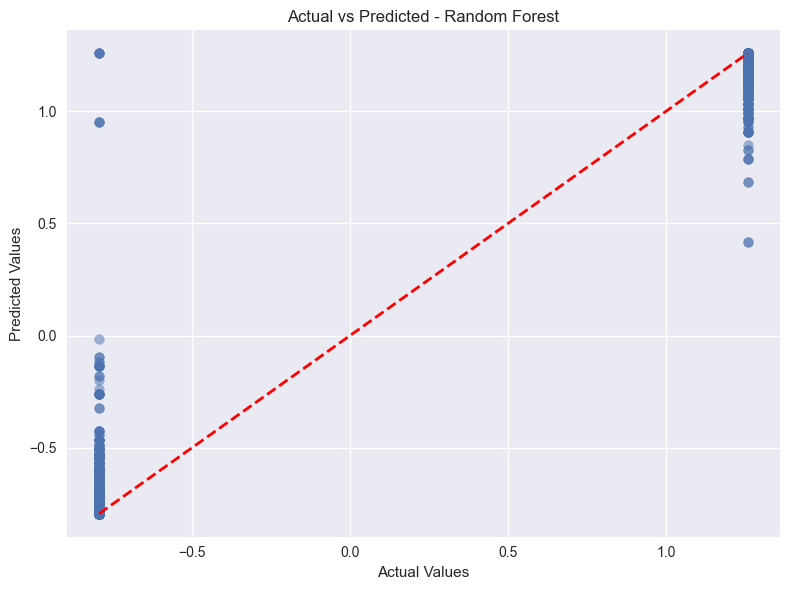


=== Kết quả đánh giá Support Vector Regression ===
Mean Squared Error: 0.3164
Root Mean Squared Error: 0.5625
Mean Absolute Error: 0.2946
R2 Score: 0.6835
Cross-validation R2 scores: [0.69663444 0.68325132 0.69149315 0.69968091 0.68168328]
Mean CV R2 score: 0.6905 (+/- 0.0142)


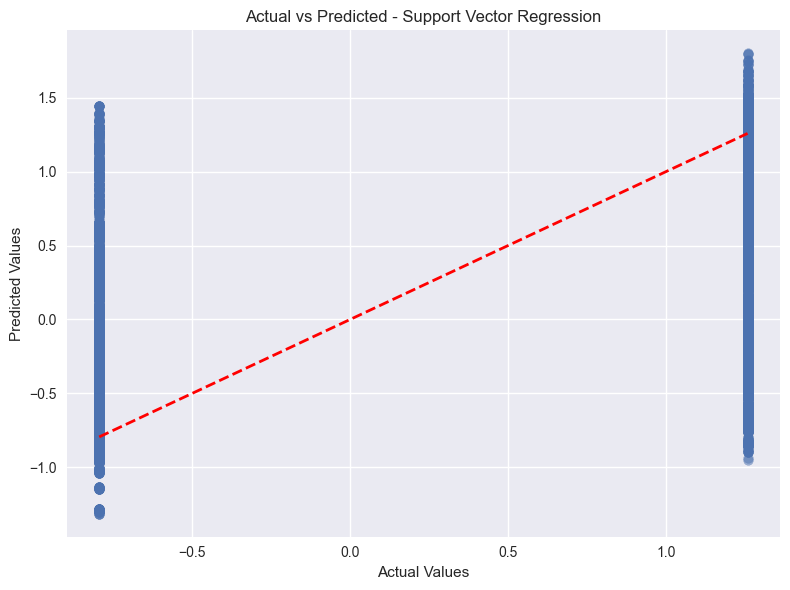


=== Kết quả đánh giá K-Nearest Neighbors ===
Mean Squared Error: 0.0404
Root Mean Squared Error: 0.2011
Mean Absolute Error: 0.0362
R2 Score: 0.9596
Cross-validation R2 scores: [0.94702974 0.9475534  0.94297436 0.94995358 0.94424462]
Mean CV R2 score: 0.9464 (+/- 0.0050)


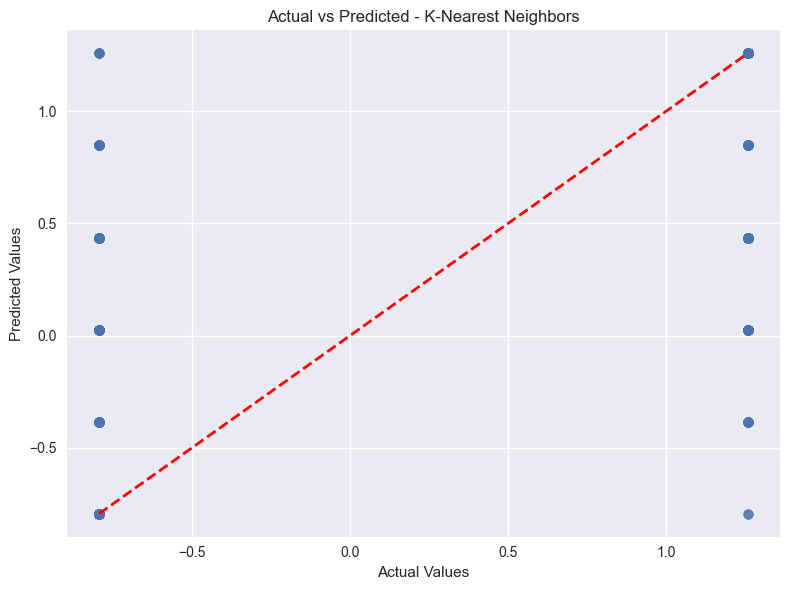


=== Kết quả đánh giá XGBoost ===
Mean Squared Error: 0.0361
Root Mean Squared Error: 0.1900
Mean Absolute Error: 0.0705
R2 Score: 0.9639
Cross-validation R2 scores: [0.96492653 0.96514104 0.96051305 0.96589007 0.96506165]
Mean CV R2 score: 0.9643 (+/- 0.0039)


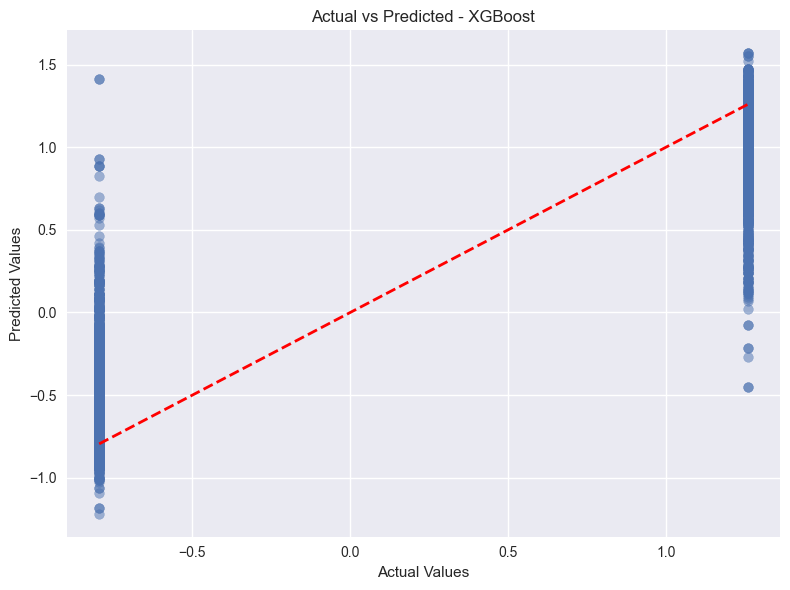


=== 4. So sánh các mô hình ===
               Model  R2 Score  CV R2 Score
1      Decision Tree  0.998061     0.991693
2      Random Forest  0.996244     0.990550
5            XGBoost  0.963905     0.964306
4                KNN  0.959566     0.946351
3                SVR  0.683510     0.690549
0  Linear Regression  0.292420     0.289720


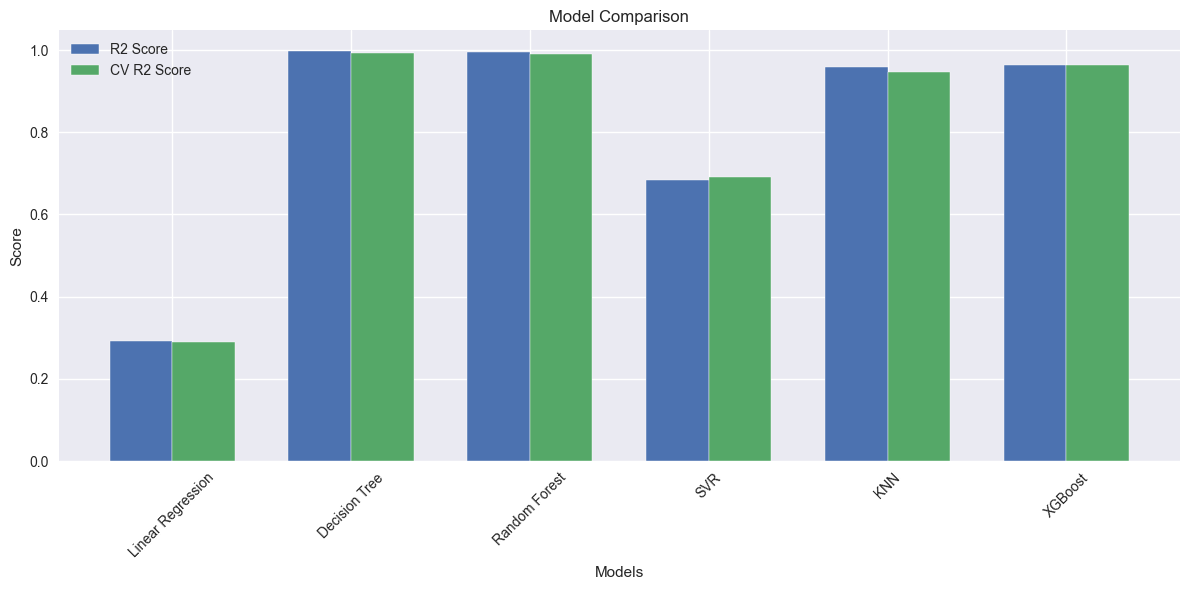


=== Lưu mô hình tốt nhất: Decision Tree ===

=== 7. Kết luận ===

1. Mô hình tốt nhất: Decision Tree
2. R2 Score trên tập test: 0.9981



In [19]:

# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# 1. Đọc và chuẩn bị dữ liệu
print("=== 1. Đọc và chuẩn bị dữ liệu ===")
# Đọc dữ liệu
df = pd.read_csv('processed_network_flow_data.csv')

# Tách features và target
X = df.drop('class', axis=1)
y = df['class']

# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Định nghĩa hàm đánh giá mô hình
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train mô hình
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính các metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # In kết quả
    print(f"\n=== Kết quả đánh giá {model_name} ===")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-validation R2 scores: {cv_scores}")
    print(f"Mean CV R2 score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

    # Vẽ Scatter plot của giá trị thực tế vs dự đoán
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.tight_layout()
    plt.show()

    return r2, cv_scores.mean()

# 3. Train và đánh giá các mô hình
print("\n=== 3. Training và đánh giá các mô hình ===")

# 3.1 Linear Regression
lr_model = LinearRegression()
lr_r2, lr_cv = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test,
                            "Linear Regression")

# 3.2 Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_r2, dt_cv = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test,
                            "Decision Tree")

# 3.3 Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_r2, rf_cv = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test,
                            "Random Forest")

# 3.4 SVR
svr_model = SVR()
svr_r2, svr_cv = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test,
                              "Support Vector Regression")

# 3.5 KNN
knn_model = KNeighborsRegressor()
knn_r2, knn_cv = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test,
                              "K-Nearest Neighbors")

# 3.6 XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_r2, xgb_cv = evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test,
                              "XGBoost")

# 4. So sánh các mô hình
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest',
              'SVR', 'KNN', 'XGBoost'],
    'R2 Score': [lr_r2, dt_r2, rf_r2, svr_r2, knn_r2, xgb_r2],
    'CV R2 Score': [lr_cv, dt_cv, rf_cv, svr_cv, knn_cv, xgb_cv]
})

print("\n=== 4. So sánh các mô hình ===")
print(models_comparison.sort_values('CV R2 Score', ascending=False))

# Visualize model comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(models_comparison))
width = 0.35

plt.bar(x - width/2, models_comparison['R2 Score'], width, label='R2 Score')
plt.bar(x + width/2, models_comparison['CV R2 Score'], width, label='CV R2 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, models_comparison['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Lưu mô hình tốt nhất
best_model_name = models_comparison.loc[models_comparison['CV R2 Score'].idxmax(), 'Model']
print(f"\n=== Lưu mô hình tốt nhất: {best_model_name} ===")

if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'SVR':
    best_model = svr_model
elif best_model_name == 'KNN':
    best_model = knn_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model

import joblib
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("\n=== 7. Kết luận ===")
print(f"""
1. Mô hình tốt nhất: {best_model_name}
2. R2 Score trên tập test: {r2_score(y_test, best_model.predict(X_test_scaled)):.4f}
""")

=== 1. Đọc và chuẩn bị dữ liệu ===

=== 3. Training và đánh giá các mô hình ===

=== Kết quả đánh giá Linear Regression ===
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0018
Mean Absolute Error: 0.0004
R2 Score: 1.0000
Cross-validation R2 scores: [0.99999935 0.99999912 0.99996073 0.99997608 0.9999992 ]
Mean CV R2 score: 1.0000 (+/- 0.0000)


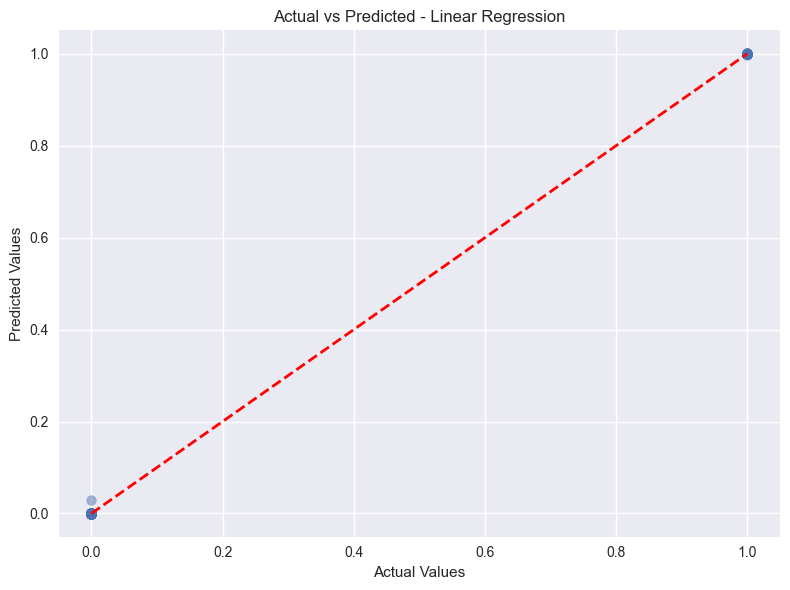


=== Kết quả đánh giá Decision Tree ===
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score: 1.0000
Cross-validation R2 scores: [1. 1. 1. 1. 1.]
Mean CV R2 score: 1.0000 (+/- 0.0000)


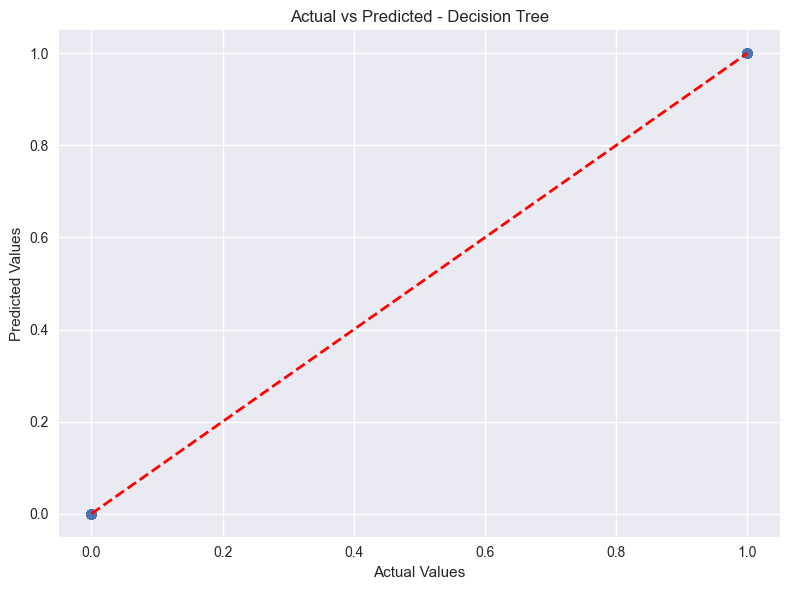


=== Kết quả đánh giá Random Forest ===
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score: 1.0000
Cross-validation R2 scores: [0.99962521 0.99981685 0.99988213 1.         0.99930833]
Mean CV R2 score: 0.9997 (+/- 0.0005)


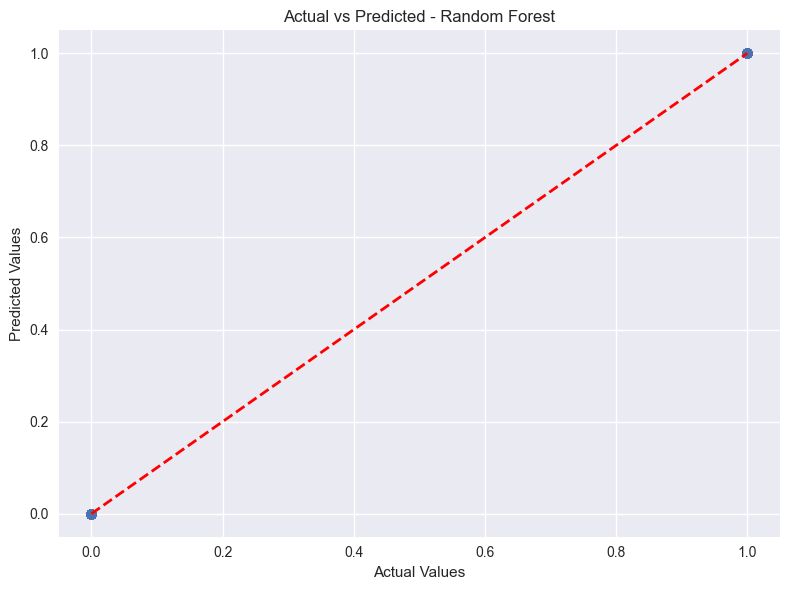


=== Kết quả đánh giá Support Vector Regression ===
Mean Squared Error: 0.0061
Root Mean Squared Error: 0.0779
Mean Absolute Error: 0.0725
R2 Score: 0.9720
Cross-validation R2 scores: [0.97206757 0.96519219 0.97345586 0.97426557 0.97160601]
Mean CV R2 score: 0.9713 (+/- 0.0064)


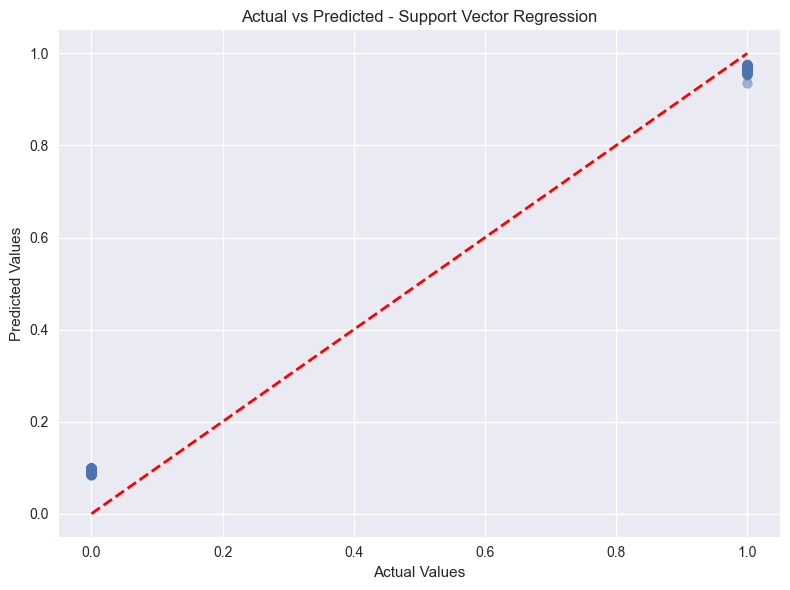


=== Kết quả đánh giá K-Nearest Neighbors ===
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score: 1.0000
Cross-validation R2 scores: [1. 1. 1. 1. 1.]
Mean CV R2 score: 1.0000 (+/- 0.0000)


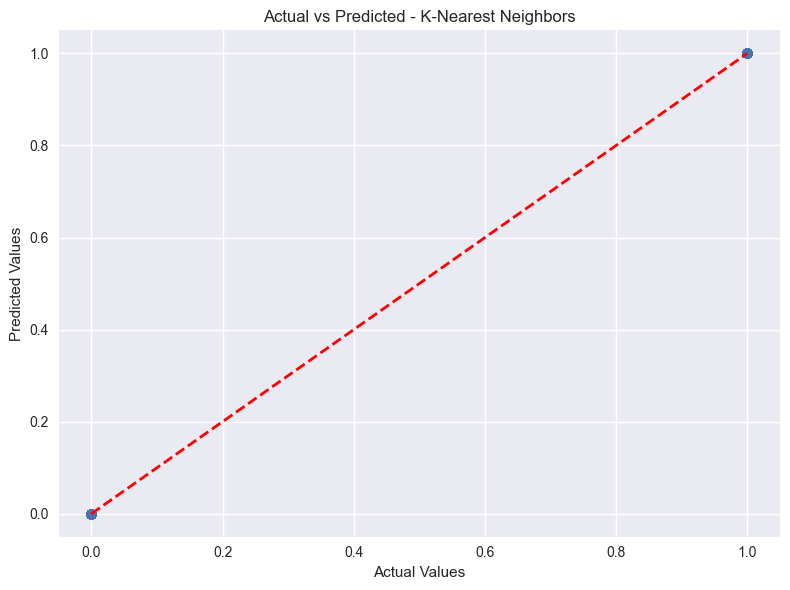


=== Kết quả đánh giá XGBoost ===
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score: 1.0000
Cross-validation R2 scores: [1. 1. 1. 1. 1.]
Mean CV R2 score: 1.0000 (+/- 0.0000)


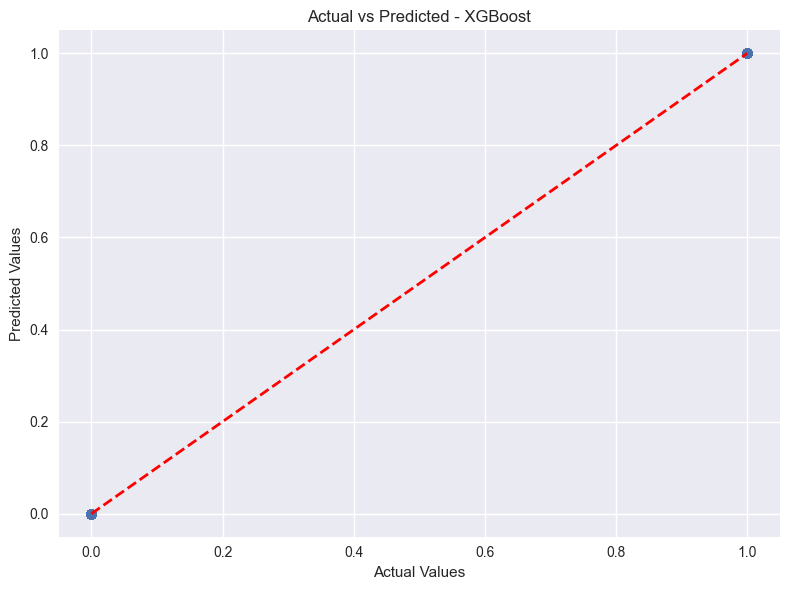


=== 4. So sánh các mô hình ===
               Model  R2 Score  CV R2 Score
1      Decision Tree  1.000000     1.000000
4                KNN  1.000000     1.000000
5            XGBoost  1.000000     1.000000
0  Linear Regression  0.999986     0.999987
2      Random Forest  1.000000     0.999727
3                SVR  0.971960     0.971317


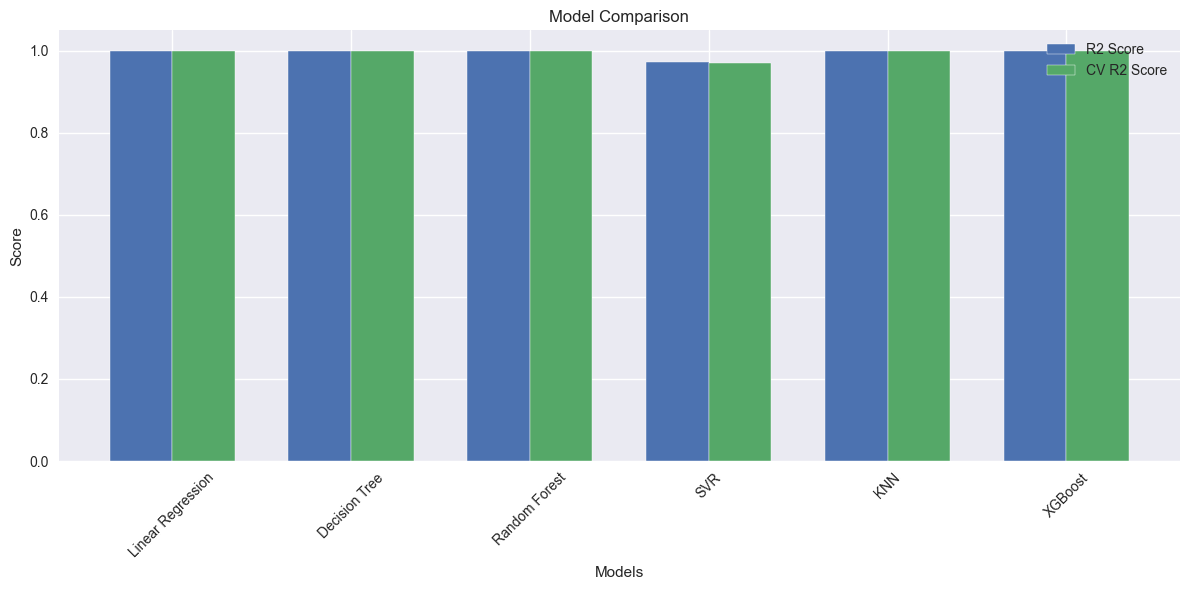


=== Lưu mô hình tốt nhất: Decision Tree ===

=== 7. Kết luận ===

1. Mô hình tốt nhất: Decision Tree
2. R2 Score trên tập test: 1.0000



In [20]:

# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# 1. Đọc và chuẩn bị dữ liệu
print("=== 1. Đọc và chuẩn bị dữ liệu ===")
# Đọc dữ liệu
df = pd.read_csv('app/training/classifier/dataset.csv')

# Tách features và target
X = df.drop('class', axis=1)
y = df['class']

# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Định nghĩa hàm đánh giá mô hình
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train mô hình
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính các metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # In kết quả
    print(f"\n=== Kết quả đánh giá {model_name} ===")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-validation R2 scores: {cv_scores}")
    print(f"Mean CV R2 score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

    # Vẽ Scatter plot của giá trị thực tế vs dự đoán
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.tight_layout()
    plt.show()

    return r2, cv_scores.mean()

# 3. Train và đánh giá các mô hình
print("\n=== 3. Training và đánh giá các mô hình ===")

# 3.1 Linear Regression
lr_model = LinearRegression()
lr_r2, lr_cv = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test,
                            "Linear Regression")

# 3.2 Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_r2, dt_cv = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test,
                            "Decision Tree")

# 3.3 Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_r2, rf_cv = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test,
                            "Random Forest")

# 3.4 SVR
svr_model = SVR()
svr_r2, svr_cv = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test,
                              "Support Vector Regression")

# 3.5 KNN
knn_model = KNeighborsRegressor()
knn_r2, knn_cv = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test,
                              "K-Nearest Neighbors")

# 3.6 XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_r2, xgb_cv = evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test,
                              "XGBoost")

# 4. So sánh các mô hình
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest',
              'SVR', 'KNN', 'XGBoost'],
    'R2 Score': [lr_r2, dt_r2, rf_r2, svr_r2, knn_r2, xgb_r2],
    'CV R2 Score': [lr_cv, dt_cv, rf_cv, svr_cv, knn_cv, xgb_cv]
})

print("\n=== 4. So sánh các mô hình ===")
print(models_comparison.sort_values('CV R2 Score', ascending=False))

# Visualize model comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(models_comparison))
width = 0.35

plt.bar(x - width/2, models_comparison['R2 Score'], width, label='R2 Score')
plt.bar(x + width/2, models_comparison['CV R2 Score'], width, label='CV R2 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, models_comparison['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Lưu mô hình tốt nhất
best_model_name = models_comparison.loc[models_comparison['CV R2 Score'].idxmax(), 'Model']
print(f"\n=== Lưu mô hình tốt nhất: {best_model_name} ===")

if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'SVR':
    best_model = svr_model
elif best_model_name == 'KNN':
    best_model = knn_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model

import joblib
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("\n=== 7. Kết luận ===")
print(f"""
1. Mô hình tốt nhất: {best_model_name}
2. R2 Score trên tập test: {r2_score(y_test, best_model.predict(X_test_scaled)):.4f}
""")